# Descriptive Statistics and Time Series

In [2]:
! pip install quandl # lib has time-series data sets (stocks, etc.)

You should consider upgrading via the 'c:\users\rjsch\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import quandl
plt.style.use('seaborn-darkgrid')

## Quandl and Financial Data

In [4]:
#!pip install quandl
quandl.ApiConfig.api_key = 'your_api_key'

In [5]:
quandl.ApiConfig.api_key = 'YM-RT4CFETsfzRzTNXKt'

In [6]:
aapl = quandl.get('WIKI/AAPL')

In [7]:
aapl.head() # quandl comes w/ date-time already as the index

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


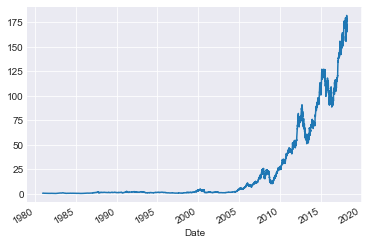

In [8]:
aapl['Adj. Close'].plot()

## Mean

In [9]:
aapl['Adj. Close'].mean()

21.56766381089097

In [10]:
aapl['Adj. Close'].max()

181.72

In [11]:
aapl['Adj. Close'].min()

0.16173095911937

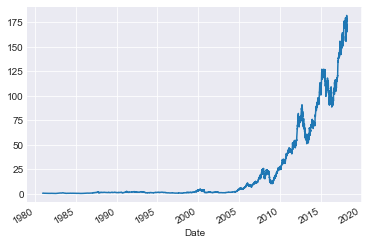

In [12]:
aapl['Adj. Close'].plot()

### `.rolling()`

In [13]:
aapl['Adj. Close'].rolling(10) # creates rolling window parm is length

Rolling [window=10,center=False,axis=0]

In [14]:
aapl['Adj. Close'].rolling(10).mean().head()

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
Name: Adj. Close, dtype: float64

In [15]:
aapl['Adj. Close'].rolling(10).mean().tail() 
# rolling mean reps the ave of most recent 10 days

Date
2018-03-21    177.5530
2018-03-22    176.7435
2018-03-23    175.2395
2018-03-26    174.3445
2018-03-27    173.1815
Name: Adj. Close, dtype: float64

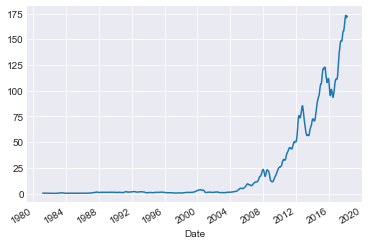

In [16]:
aapl['Adj. Close'].rolling(50).mean().plot()

### Volatility

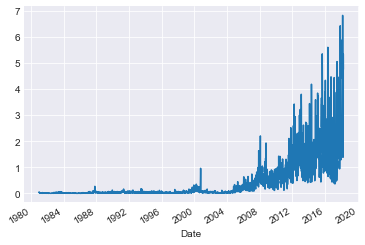

In [17]:
aapl['Adj. Close'].rolling(10).std().plot()

### Stationarity

> *In mathematics and statistics, a stationary process (a.k.a. a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time. -- [Wikipedia](https://en.wikipedia.org/wiki/Stationary_process)*

In [18]:
x = np.linspace(0, 6*np.pi, 200)
y = np.cos(x) + np.random.random(200)

# co-sin is an example of a trig function that demos consistent 
# mean and variance over time
# we can see that Apple stock is NOT stationary

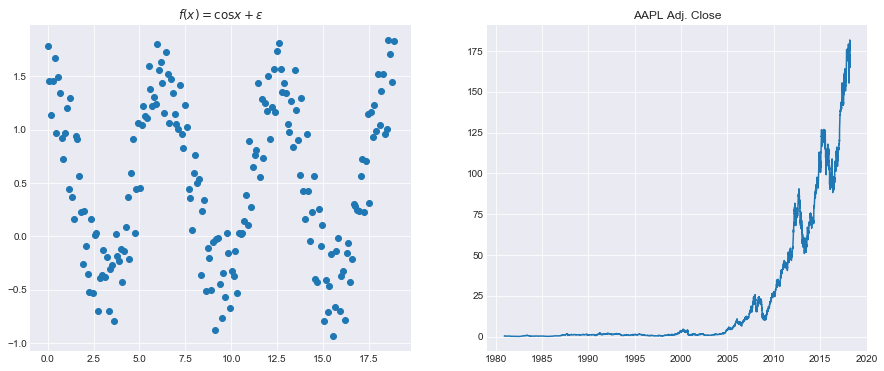

In [19]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.plot(x, y, 'o')
plt.title('$f(x) = \cos{x} + \epsilon$')
plt.subplot(122)
plt.plot(aapl['Adj. Close'])
plt.title('AAPL Adj. Close');

### `.diff()`

$$\text{today's adjusted closing price} - \text{yesterday's adjusted closing price}$$

In [20]:
aapl['Adj. Close'].diff(1).head() # see def. above

Date
1980-12-12         NaN
1980-12-15   -0.022054
1980-12-16   -0.029406
1980-12-17    0.009116
1980-12-18    0.011174
Name: Adj. Close, dtype: float64

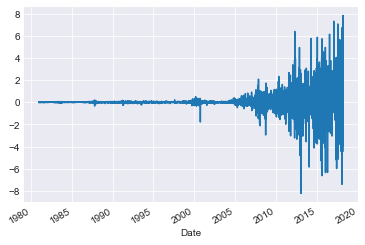

In [21]:
aapl['Adj. Close'].diff(1).plot()
# this plot show stationarity of the mean but not the variance

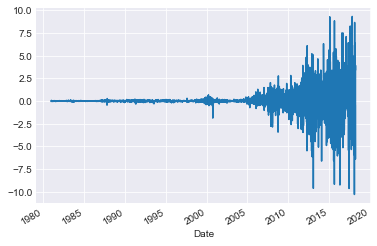

In [22]:
aapl['Adj. Close'].diff(2).plot()

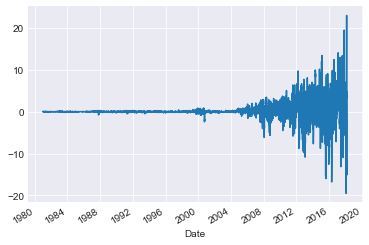

In [23]:
aapl['Adj. Close'].diff(10).plot()

### Testing for Stationarity

> *In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models. -- [Wikipedia](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)*

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
recent_data = aapl['2017':]['Adj. Close']
# considering only the data that seems non-stationary

In [28]:
#testing original series
adfuller(recent_data)[1]
# extract the first entry in the tuple value of the value test
# show the value of Apple is not stationary
#fail to reject the null hyp. that the value of Apple is not stationary


0.20825025257318408

In [30]:
#testing first difference of series
adfuller(recent_data.diff(1).dropna())[1]
# when we utilize the '.diff' data we see consistency over time
# see plots below

9.78314290445191e-11

Text(0.5, 1.0, 'Diff = 1')

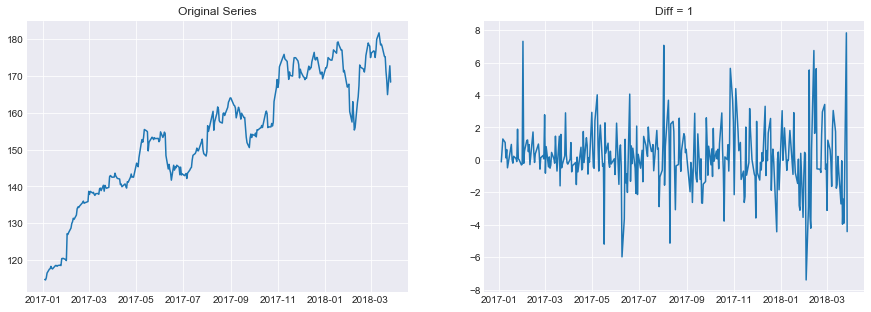

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
ax[0].plot(recent_data)
ax[0].set_title('Original Series')
ax[1].plot(recent_data.diff(1).dropna())
ax[1].set_title('Diff = 1')

### Autocorrelation

$$r_1 = \displaystyle \frac{\sum_{t = 1}^{N-1}(x_t - \bar{x}_{(1)})(x_{t+1} - \bar{x}_{(2)})}{\sqrt{\sum_{t=1}^{N-1}(x_t - \bar{x}_{(2)})^2}}$$

Tells us the relationship between successive obs in a time-series rather than 2 obs

In [32]:
aapl['Adj. Close'].tail()

Date
2018-03-21    171.270
2018-03-22    168.845
2018-03-23    164.940
2018-03-26    172.770
2018-03-27    168.340
Name: Adj. Close, dtype: float64

In [33]:
from pandas.plotting import autocorrelation_plot

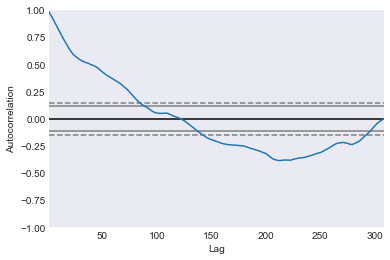

In [34]:
autocorrelation_plot(recent_data) 
# see strong correlation w/ opening price then reduce and resurge
# this downward movement is something we want to take notice of

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

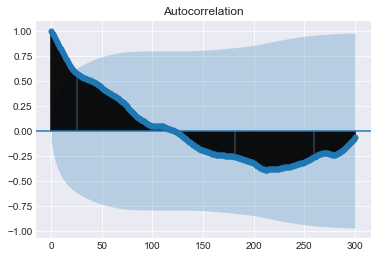

In [36]:
plot_acf(recent_data, lags=300);
# same line at lags = 300 (see def of 'lags=')

Date
2018-01-03    172.23
2018-01-04    173.03
2018-01-05    175.00
2018-01-08    174.35
2018-01-09    174.33
2018-01-10    174.29
2018-01-11    175.28
2018-01-12    177.09
2018-01-16    176.19
2018-01-17    179.10
Name: Adj. Close, dtype: float64


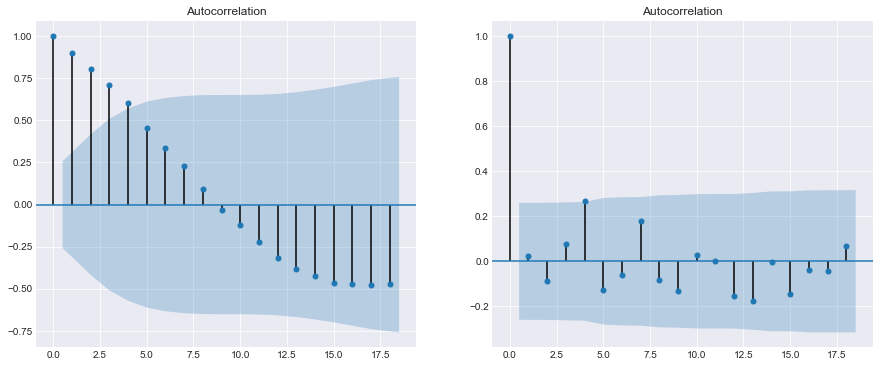

<Figure size 1080x432 with 0 Axes>

In [37]:
print(recent_data[250:].head(10))
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
plt.figure(figsize = (15, 6))
plot_acf(recent_data[250:], ax = ax[0]);
plot_acf(recent_data[250:].diff().dropna(), ax = ax[1]);

#comparison of orginal time-series w/ '.diff' time-series
# are not highly correlated and the slow decline bring question to 
# whether the corrleation is stationary

### Airbnb Example

<center>
    <img src = 'airbnb.jpg' height = 400 width = 500 />
    </center>


In [33]:
bnb = pd.read_csv('data/listings.csv')

In [34]:
bnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288


In [35]:
revs = bnb.groupby('last_review')['id'].count()

In [36]:
revs.index = pd.to_datetime(revs.index)

In [37]:
revs = revs.sort_index(ascending = False)
revs.fillna(value = 0, inplace = True)

In [38]:
revs.head()

last_review
2019-08-15      1
2019-08-12      1
2019-08-06    102
2019-08-05    464
2019-08-04    929
Name: id, dtype: int64

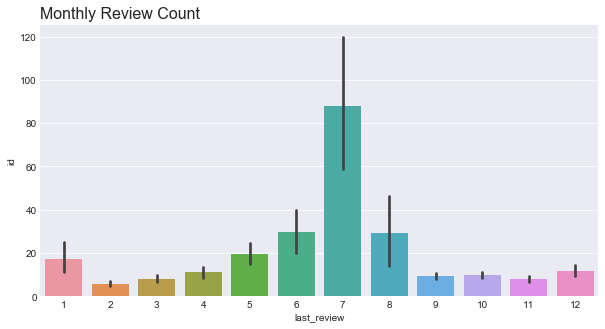

In [39]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.barplot(revs.index.month, revs)
plt.title('Monthly Review Count', fontsize = 16, loc = 'left');

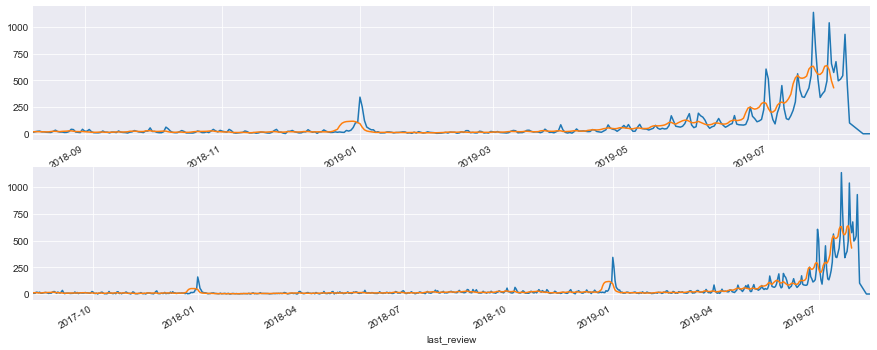

In [41]:
#plot one year of reviews
fig, ax = plt.subplots(nrows = 2, ncols = 1)
revs.head(365).plot(figsize = (15, 6), ax = ax[0])
revs.rolling(10).mean().head(365).plot(ax = ax[0])

#two years of reviews
revs.head(730).plot(figsize = (15, 6), ax = ax[1])
revs.rolling(10).mean().head(730).plot(ax = ax[1])

In [42]:
#last year stationary?
adfuller(revs[-365:])[1]

9.652567462533078e-08

In [43]:
#First diff test
adfuller(revs[-365:].diff().dropna())[1]

9.300224708162586e-15

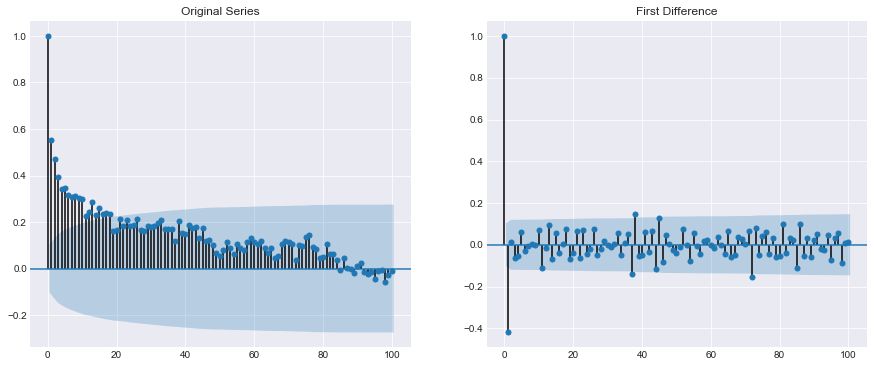

In [44]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (15, 6))
plot_acf(revs[-365:], lags = 100, ax = ax[0], title = 'Original Series');

plot_acf(revs[-365:].diff(1).dropna(), lags = 100, ax = ax[1], title = 'First Difference');